In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from nltk import word_tokenize
from collections import Counter
%matplotlib inline
from ggplot import *


### Carregando os dados

In [2]:
dados = pd.read_csv("../dados/estadao_noticias_eleicao.csv")

In [3]:
dados.head()

,timestamp,titulo,subTitulo,conteudo,url,idNoticia
0,2014-12-31T00:00:00Z,PT espera 30 mil pessoas em festa na Esplanada,Objetivo é demonstrar apoio popular a Dilma e ...,BRASÍLIA - Após o desgaste provocado com o lan...,"http://politica.estadao.com.br/noticias/geral,...",1
1,2014-12-31T00:00:00Z,Alckmin toma posse de olho no Planalto,Governador reeleito tenta amarrar tucanos paul...,"Reeleito em outubro, o governador tucano Geral...","http://politica.estadao.com.br/noticias/geral,...",2
2,2014-12-31T00:00:00Z,Seis obstáculos e desafios do segundo mandato ...,"Em meio a escândalo de corrupção, presidente t...",1. Rearranjo das contas A nova equipe econôm...,"http://politica.estadao.com.br/noticias/geral,...",3
3,2014-12-31T00:00:00Z,NaN,Veja as principais fotos do dia e dos eventos ...,NaN,"http://fotos.estadao.com.br/fotos/politica,dil...",4
4,2014-12-31T00:00:00Z,NaN,Veja as principais fotos do dia e dos eventos ...,NaN,"http://fotos.estadao.com.br/fotos/politica,dil...",5


### Substituindo valores faltantes

In [4]:
dados = dados.replace(np.nan, '', regex=True)

### Overview

In [4]:
dados.head()

,timestamp,titulo,subTitulo,conteudo,url,idNoticia
0,2014-12-31T00:00:00Z,PT espera 30 mil pessoas em festa na Esplanada,Objetivo é demonstrar apoio popular a Dilma e ...,BRASÍLIA - Após o desgaste provocado com o lan...,"http://politica.estadao.com.br/noticias/geral,...",1
1,2014-12-31T00:00:00Z,Alckmin toma posse de olho no Planalto,Governador reeleito tenta amarrar tucanos paul...,"Reeleito em outubro, o governador tucano Geral...","http://politica.estadao.com.br/noticias/geral,...",2
2,2014-12-31T00:00:00Z,Seis obstáculos e desafios do segundo mandato ...,"Em meio a escândalo de corrupção, presidente t...",1. Rearranjo das contas A nova equipe econôm...,"http://politica.estadao.com.br/noticias/geral,...",3
3,2014-12-31T00:00:00Z,NaN,Veja as principais fotos do dia e dos eventos ...,NaN,"http://fotos.estadao.com.br/fotos/politica,dil...",4
4,2014-12-31T00:00:00Z,NaN,Veja as principais fotos do dia e dos eventos ...,NaN,"http://fotos.estadao.com.br/fotos/politica,dil...",5


In [6]:
dados['documento'] = dados.titulo + ' ' + dados.subTitulo + ' ' + dados.conteudo

### Tokens por documento

In [7]:
dados['tokens'] = dados.apply(lambda row: Counter(word_tokenize(row['documento'].replace('.', '').lower())), axis=1)

In [5]:
dados.head()

,timestamp,titulo,subTitulo,conteudo,url,idNoticia
0,2014-12-31T00:00:00Z,PT espera 30 mil pessoas em festa na Esplanada,Objetivo é demonstrar apoio popular a Dilma e ...,BRASÍLIA - Após o desgaste provocado com o lan...,"http://politica.estadao.com.br/noticias/geral,...",1
1,2014-12-31T00:00:00Z,Alckmin toma posse de olho no Planalto,Governador reeleito tenta amarrar tucanos paul...,"Reeleito em outubro, o governador tucano Geral...","http://politica.estadao.com.br/noticias/geral,...",2
2,2014-12-31T00:00:00Z,Seis obstáculos e desafios do segundo mandato ...,"Em meio a escândalo de corrupção, presidente t...",1. Rearranjo das contas A nova equipe econôm...,"http://politica.estadao.com.br/noticias/geral,...",3
3,2014-12-31T00:00:00Z,NaN,Veja as principais fotos do dia e dos eventos ...,NaN,"http://fotos.estadao.com.br/fotos/politica,dil...",4
4,2014-12-31T00:00:00Z,NaN,Veja as principais fotos do dia e dos eventos ...,NaN,"http://fotos.estadao.com.br/fotos/politica,dil...",5


### Criando índice invertido

In [9]:
indice_invertido = {}

In [10]:
for token_list, id_noticia in zip(dados.tokens, dados.idNoticia):
    for token in token_list.keys():
        if token not in indice_invertido.keys():
            indice_invertido[token] = [id_noticia]
        else:
            indice_invertido[token].append(id_noticia)    

### Funções auxiliares

In [11]:
def OR(termos):
    '''
        Retorna uma lista de ids de documentos que possuem ao menos um dos termos

        params:
            termos (list): uma lista de termos
        returns:
            resp (set) um conjunto de ids de documentos
    '''
    return set(indice_invertido[termos[0]]) | set(indice_invertido[termos[1]])

In [12]:
def AND(termos):
    '''
        Retorna uma lista de ids de documentos que possuem todos os termos
        
        params:
            termos (list): uma lista de termos
        returns:
            resp (set) um conjunto de ids de documentos
    '''
    resp = set(indice_invertido[termos[0]])
    for termo in termos:
        resp = resp.intersection(set(indice_invertido[termo]))
    return resp

$$
\begin{equation}
\label{inverse document frequency}
idf(t,D) = \log\frac{N}{|d \in D : t\in d|}
\end{equation}
$$

onde: 
- t: é o termo a ser observado.
- d: é o documento a ser observado
- D: é o conjunto de documentos
- N: é o total de documentos no \textit{corpus} N = |D|.

In [13]:
def idf(termo, indice_invertido):
    '''
        Função que retorna o idf. Baseia-se na presença do termo nos documentos do corpus.
        params:
            termo (str): termo alvo a ser calculado o idf.
            indice_invertido (dict): dicionário com todos os índices presentes no corpus.
    '''
    
    N = dados.shape[0] # tamanho do corpus
    return np.log(N/len(indice_invertido[termo.lower().strip()]))

In [14]:
def processa_entrada(str_busca):
    return str_busca.lower().split(' ')

In [15]:
def busca(str_busca,operador="and",tipo="binaria", n=5):
    
    termos = processa_entrada(str_busca)
    doc_ids = list(busca_binaria(termos, operador))

    resp = []
    
    if tipo == "binaria":
        resp = doc_ids
    elif tipo == "tf":
        resp = busca_tf(termos, doc_ids, n)
    elif tipo == "tfidf":
        resp = busca_tfidf(termos, doc_ids, n)
    elif tipo == "bm25":
        resp = busca_bm25(termos, doc_ids, n)
        
    return resp[:n]

### Busca binária

In [16]:
def busca_binaria(termos, operador):
    
    resp = []
    
    if operador == 'or':
        resp = OR(termos)
    elif operador == 'and':
        resp = AND(termos)
        
    return resp

### Resultados Busca Binária

In [17]:
busca_binaria_predicoes = [busca("segundo turno"),busca("lava jato"),busca("projeto de lei"), busca("compra de voto"),
                          busca("ministério público")]

In [18]:
busca_binaria_predicoes

[[2048, 1, 2049, 2050, 4096],
 [3, 13, 15, 27, 6177],
 [3584, 6145, 8194, 8706, 6660],
 [7424, 2178, 6531, 5122, 2311],
 [8194, 7, 4104, 8201, 4109]]

In [19]:
def busca_tf(termos, doc_ids, n):
    
    '''
        Retorna os ids dos documentos a partir da frequência total dos termos.
        params:
            termos (list): lista de termos presentes nos documentos.
            doc_ids (list): lista de ids de documentos
            n (int): número de ids de documentos retornados
        returns:
            (list): Lista de ids de documentos
    '''
    
    documentos = dados.loc[dados['idNoticia'].isin(doc_ids)] # filtra os documentos do dataset pelos ids fornecidos
    documentos['total_tf'] = documentos.apply(lambda row: sum([row.tokens[termos[i]] for i in range(len(termos))]), axis=1) #calcula a frequência total dos termos passados na busca
            
    return list(documentos.nlargest(n, 'total_tf').idNoticia)

### Resultados Busca_TF

In [20]:
busca_tf_predicoes = [busca("segundo turno", tipo="tf"),busca("lava jato", tipo="tf"),busca("projeto de lei", tipo="tf"),
                      busca("compra de voto", tipo="tf"),busca("ministério público", tipo="tf")]

In [21]:
busca_tf_predicoes

[[2744, 7, 2112, 7672, 2388],
 [163, 353, 2807, 127, 359],
 [7, 3942, 7017, 1250, 6942],
 [3942, 7017, 5129, 2047, 748],
 [6798, 8018, 6244, 6965, 6550]]

In [22]:
def busca_tfidf(termos, doc_ids, n):
    
    '''
        Retorna os ids dos documentos a partir do tfidf total dos termos.
        params:
            termos (list): lista de termos presentes nos documentos.
            doc_ids (list): lista de ids de documentos
            n (int): número de ids de documentos retornados
        returns:
            (list): Lista de ids de documentos
    '''
    
    documentos = dados.loc[dados['idNoticia'].isin(doc_ids)]
    
    documentos['total_tfidf'] = documentos.apply(lambda row: sum([row.loc['tokens'][termos[i]]*idf(termos[i], indice_invertido) for i in range(len(termos))]), axis=1)
    
    
    return list(documentos.nlargest(n, 'total_tfidf').idNoticia)

### Resultados Busca_TFIDF

In [23]:
busca_tfidf_predicoes = [busca("segundo turno", tipo="tfidf"),busca("lava jato", tipo="tfidf"),busca("projeto de lei", tipo="tfidf"),
                      busca("compra de voto", tipo="tfidf"),busca("ministério público", tipo="tfidf")]

In [24]:
busca_tfidf_predicoes

[[2744, 2112, 7672, 1235, 2388],
 [163, 353, 2807, 127, 359],
 [7017, 2853, 7, 2232, 3171],
 [2047, 7017, 7343, 7293, 5129],
 [6798, 8018, 6244, 6965, 6550]]

In [25]:
def busca_bm25(termos, doc_ids, n):
    
    '''
        Retorna os ids dos documentos a partir do cálculo bm25 dos termos.
        params:
            termos (list): lista de termos presentes nos documentos.
            doc_ids (list): lista de ids de documentos
            n (int): número de ids de documentos retornados
        returns:
            (list): Lista de ids de documentos
    '''
    documentos = dados.loc[dados['idNoticia'].isin(doc_ids)]
    
    K = np.random.uniform(1.2, 2)
    b = 0.75
    
    documentos['total_bm25'] = documentos.apply(lambda row: sum([(idf(termos[i], indice_invertido)*row['tokens'][termos[i]]*(K+1))/(row['tokens'][termos[i]] + K) for i in range(len(termos))]), axis=1)
    
    return list(documentos.nlargest(5, 'total_bm25').idNoticia)

### Resultados BM25

In [26]:
busca_bm25_predicoes = [busca("segundo turno", tipo="bm25"),busca("lava jato", tipo="bm25"),busca("projeto de lei", tipo="bm25"),
                      busca("compra de voto", tipo="bm25"),busca("ministério público", tipo="bm25")]

In [27]:
busca_bm25_predicoes

[[2744, 2112, 7672, 2388, 2178],
 [163, 353, 2807, 127, 359],
 [2853, 3171, 2232, 6699, 6461],
 [2200, 2047, 7343, 2178, 7293],
 [6798, 8018, 6244, 6965, 6550]]

## Avaliação

#### Carrega gabarito

In [28]:
df = pd.read_csv('../dados/gabarito.csv')

In [29]:
df

,str_busca,google,busca_binaria,tf,tfidf,bm25
0,segundo turno,"[1062, 1942, 2161, 2078, 2073]","[2048, 1, 2049, 2050, 4096]","[2744, 7, 2112, 7672, 2388]","[2744, 2112, 7672, 1235, 2388]","[2744, 2112, 7672, 2388, 2178]"
1,lava jato,"[616, 164, 1734, 163, 6716]","[3, 13, 15, 27, 6177]","[163, 353, 2807, 127, 359]","[163, 353, 2807, 127, 359]","[163, 353, 2807, 127, 359]"
2,projeto de lei,"[2853, 275, 978, 7092, 3171]","[3584, 6145, 8194, 8706, 6660]","[7, 3942, 7017, 1250, 6942]","[2232, 6461, 2853, 3171, 3942]","[2232, 6461, 3171, 2853, 3170]"
3,compra de voto,"[2200, 8615, 2265, 7746, 82]","[7424, 2178, 6531, 5122, 2311]","[3942, 7017, 5129, 2047, 748]","[7343, 7293, 6791, 3942, 2047]","[7343, 7293, 6791, 7329, 8615]"
4,ministério público,"[64, 6652, 164, 6550, 8615]","[8194, 7, 4104, 8201, 4109]","[6798, 8018, 6244, 6965, 6550]","[6798, 8018, 6244, 6965, 6550]","[6798, 8018, 6244, 6965, 6550]"


#### Ajuste de tipo string para lista de inteiros nas células do dataframe

In [30]:
gabarito = pd.concat([df.str_busca,df.loc[:, df.columns != 'str_busca'].applymap(lambda cell: [int(idx) for idx in cell.replace('[','').replace(']','').strip().split(',')])], axis=1)

### Métrica de avaliação: Mean Average Precision

In [31]:
#fonte: https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/average_precision.py

def apk(actual, predicted, k=5):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

### Comparando com as saídas do gabarito proposto

In [32]:
mapks_gabarito = [mapk(list(gabarito.busca_binaria), list(busca_binaria_predicoes), k=5),
                 mapk(list(gabarito.tf), list(busca_tf_predicoes), k=5),
                 mapk(list(gabarito.tfidf), list(busca_tfidf_predicoes), k=5),
                 mapk(list(gabarito.bm25), list(busca_bm25_predicoes), k=5)]

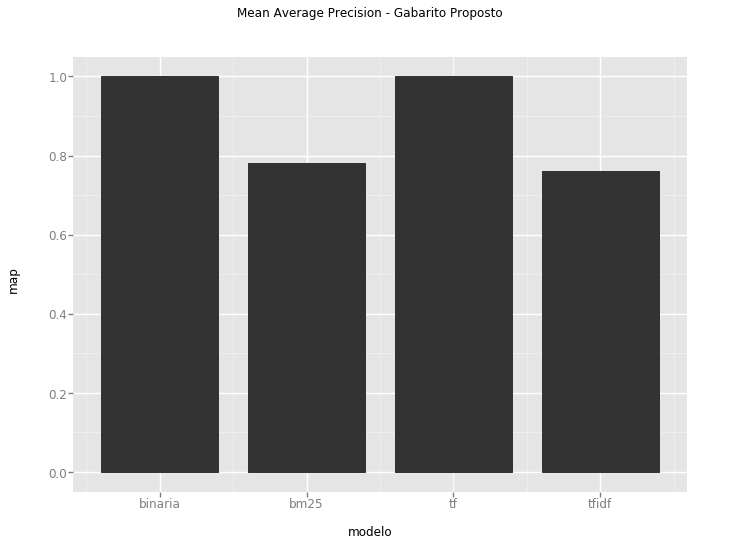

<ggplot: (7550162836)>

In [33]:
df = pd.DataFrame({'modelo': ['binaria', 'tf', 'tfidf', 'bm25'], 'map':mapks_gabarito})

ggplot(df,aes(x='modelo',weight='map')) + \
    geom_bar(stat="identity") + \
    ylab('map') + ggtitle("Mean Average Precision - Gabarito Proposto")

### Comparando com as saídas do Google

In [34]:
mapks_google = [mapk(list(gabarito.google), list(busca_binaria_predicoes), k=5),mapk(list(gabarito.google), list(busca_tf_predicoes), k=5),
        mapk(list(gabarito.google), list(busca_tfidf_predicoes), k=5), mapk(list(gabarito.google), list(busca_bm25_predicoes), k=5)]

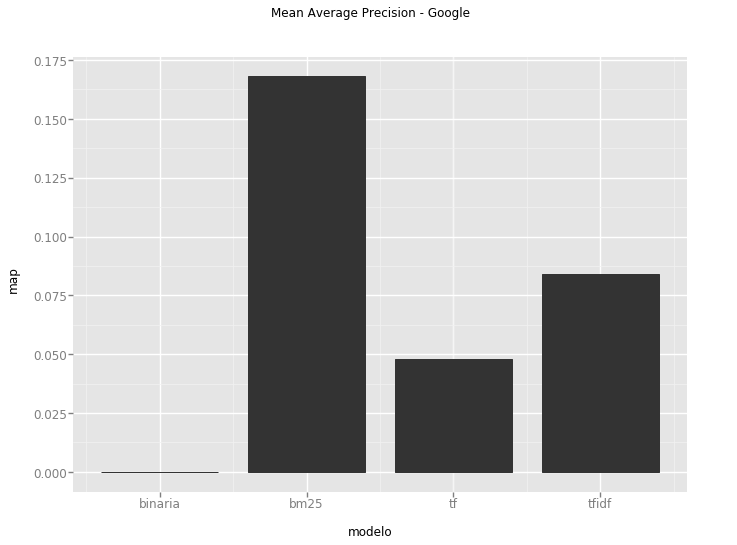

<ggplot: (-9223372029301935202)>

In [35]:
df = pd.DataFrame({'modelo': ['binaria', 'tf', 'tfidf', 'bm25'], 'map':mapks_google})

ggplot(df,aes(x='modelo',weight='map')) + \
    geom_bar(stat="identity") + \
    ylab('map') + ggtitle("Mean Average Precision - Google")